In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [51]:
data=pd.read_csv('/content/marketing_campaign.csv', delimiter='\t')

In [52]:
data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0


In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [54]:
data.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [55]:
data.nunique()

ID                     2240
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1974
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

In [56]:
data.isnull().sum().sort_values(ascending = False).head(30)

Income                 24
Response                0
MntSweetProducts        0
Year_Birth              0
Education               0
Marital_Status          0
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntGoldProds            0
Z_Revenue               0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
ID                      0
dtype: int64

In [57]:
print("income mean: ", data.Income.mean())
print("income median: ", data.Income.median())

income mean:  52247.25135379061
income median:  51381.5


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


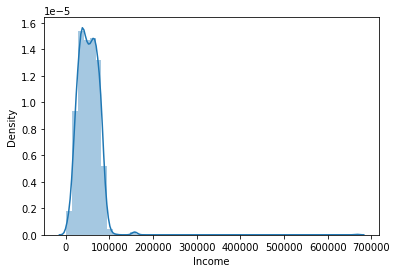

In [58]:
sns.distplot(data['Income'])
plt.show()

In [59]:
data['Income']=data['Income'].fillna(data['Income'].mean())

In [60]:
data.isnull().sum().sort_values(ascending = False).head(30)

Response               0
MntSweetProducts       0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntGoldProds           0
Z_Revenue              0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
ID                     0
dtype: int64

In [61]:
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'])

In [62]:
data['Age'] = 2014 - data['Year_Birth']
data['Collected'] = '2014-12-07'
data['Collected'] = pd.to_datetime(data['Collected'])
data['Days_is_client'] = (data['Collected'] - data['Dt_Customer']).dt.days

In [63]:
data.dtypes

ID                              int64
Year_Birth                      int64
Education                      object
Marital_Status                 object
Income                        float64
Kidhome                         int64
Teenhome                        int64
Dt_Customer            datetime64[ns]
Recency                         int64
MntWines                        int64
MntFruits                       int64
MntMeatProducts                 int64
MntFishProducts                 int64
MntSweetProducts                int64
MntGoldProds                    int64
NumDealsPurchases               int64
NumWebPurchases                 int64
NumCatalogPurchases             int64
NumStorePurchases               int64
NumWebVisitsMonth               int64
AcceptedCmp3                    int64
AcceptedCmp4                    int64
AcceptedCmp5                    int64
AcceptedCmp1                    int64
AcceptedCmp2                    int64
Complain                        int64
Z_CostContac

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7efdc6b82dd0>,
      dtype=object)

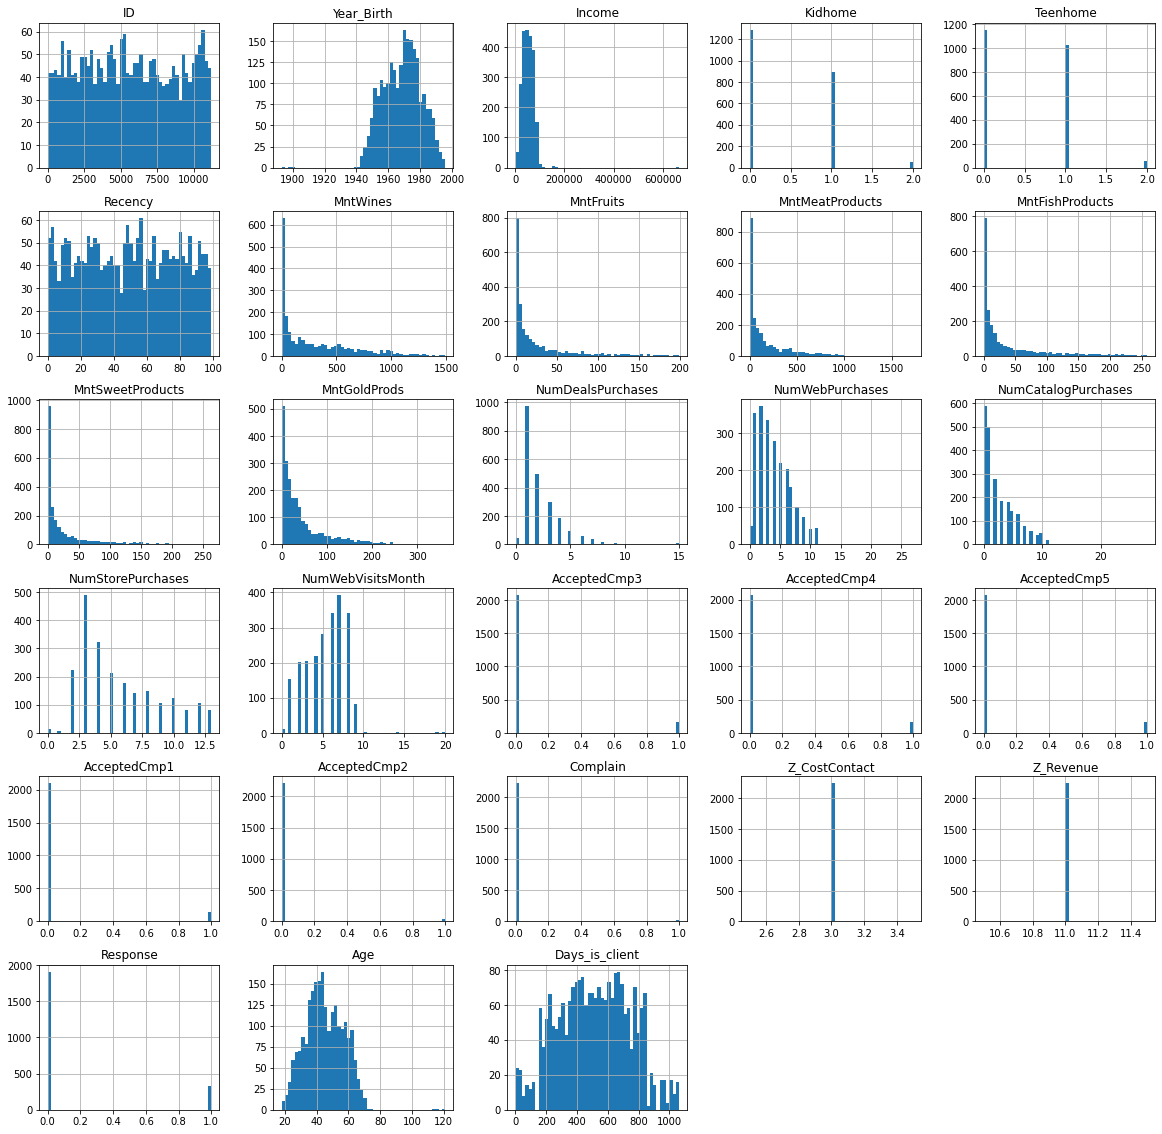

In [64]:
data.hist(bins=50, figsize=(20,20))


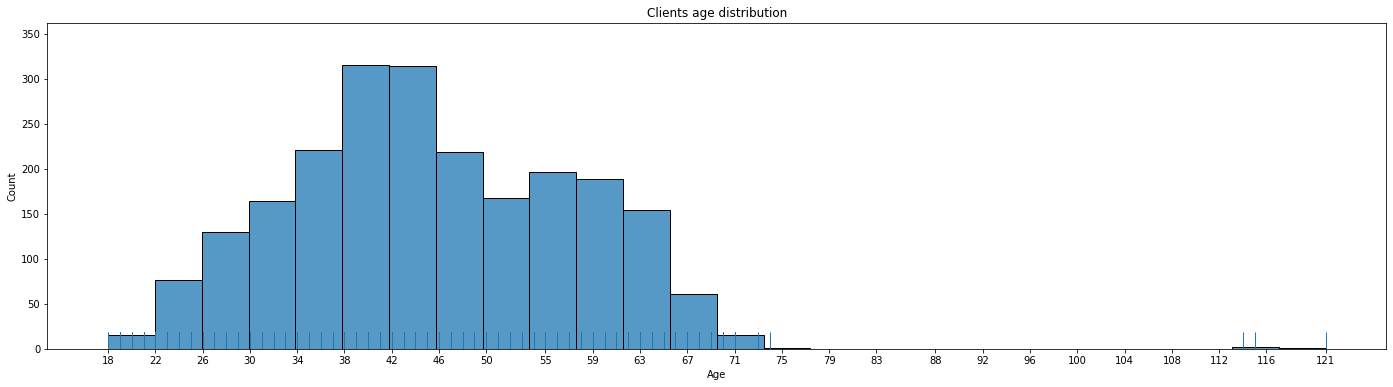

In [65]:
plt.figure(figsize=(24, 6))
plt.title('Clients age distribution')
ax = sns.histplot(data['Age'].sort_values(), bins=26)
sns.rugplot(data=data['Age'], height=.05)
plt.xticks(np.linspace(data['Age'].min(), data['Age'].max(), 26, dtype=int, endpoint = True))
plt.show()

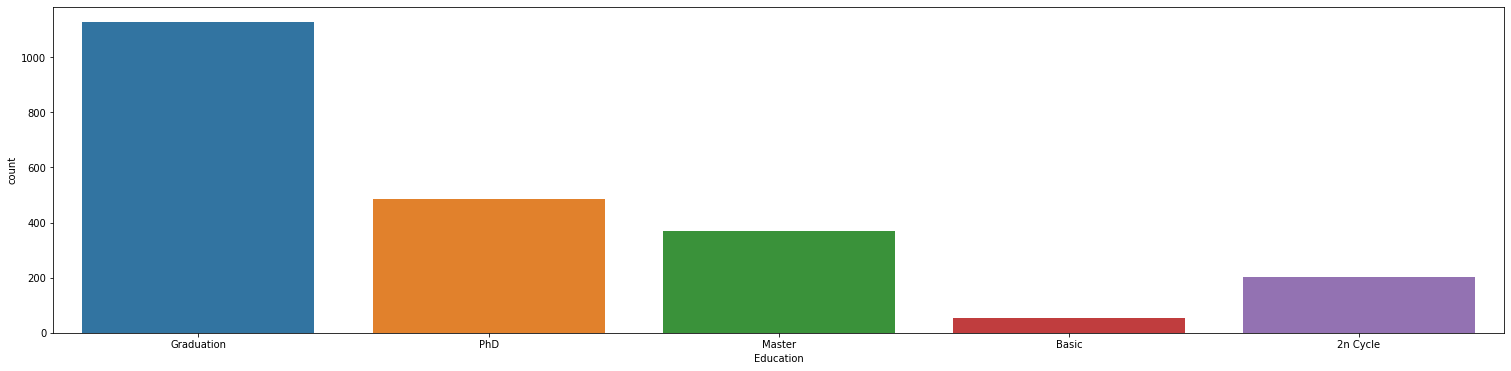

In [66]:
plt.figure(figsize=(26, 6))
sns.countplot(x="Education", data=data)


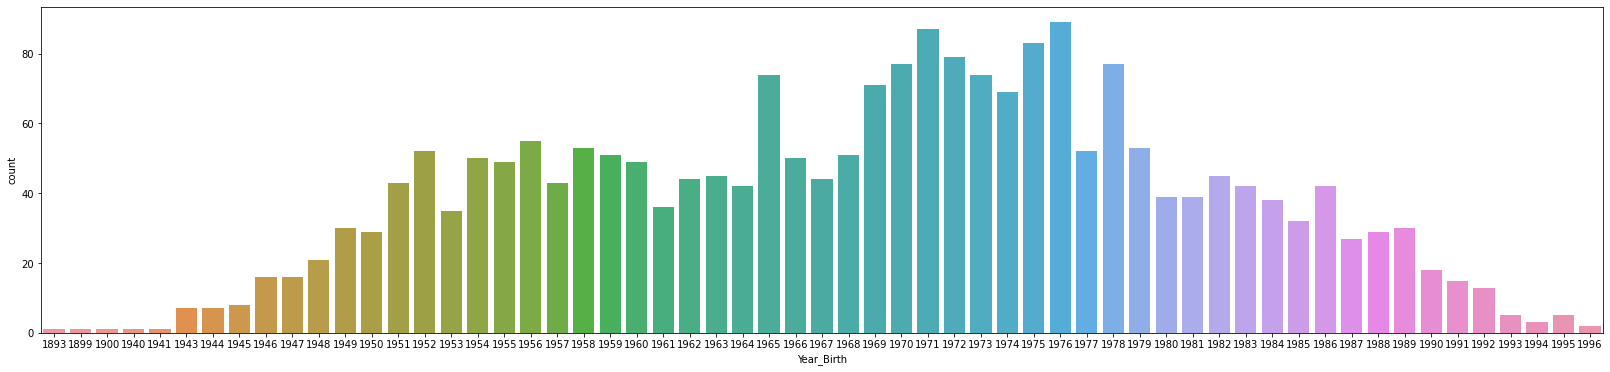

In [67]:
plt.figure(figsize=(28, 6))
sns.countplot(x="Year_Birth", data=data)

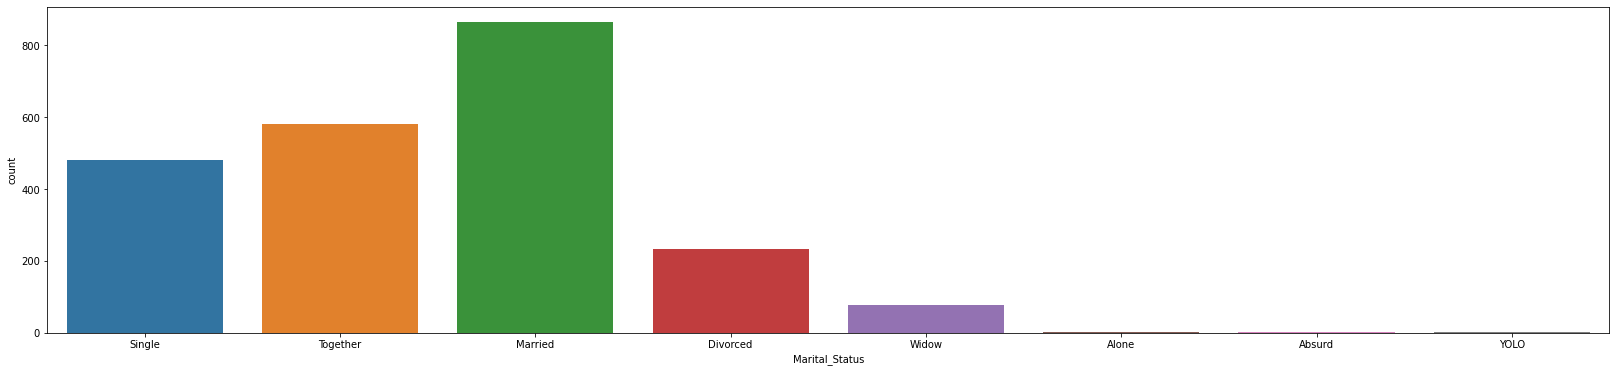

In [68]:
plt.figure(figsize=(28, 6))
sns.countplot(x="Marital_Status", data=data)

In [69]:
data["Dt_Customer"].value_counts()


2012-08-31    12
2012-12-09    11
2013-02-14    11
2014-12-05    11
2013-08-20    10
              ..
2014-06-06     1
2013-12-08     1
2014-05-15     1
2013-08-18     1
2012-10-19     1
Name: Dt_Customer, Length: 663, dtype: int64

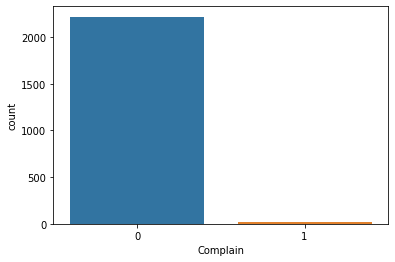

In [70]:
sns.countplot(x="Complain", data=data)


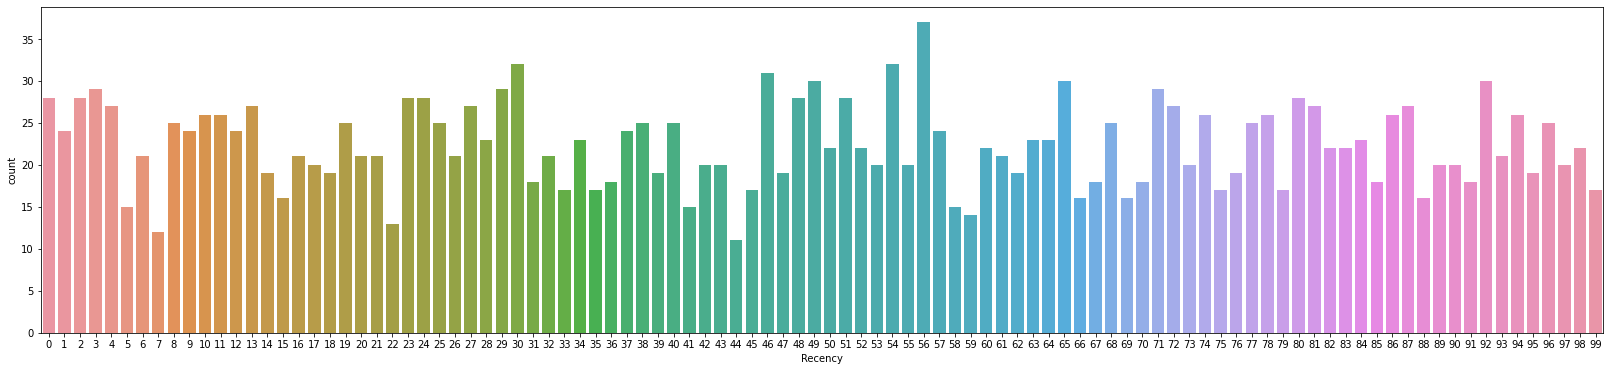

In [71]:
plt.figure(figsize=(28, 6))
sns.countplot(x="Recency", data=data)

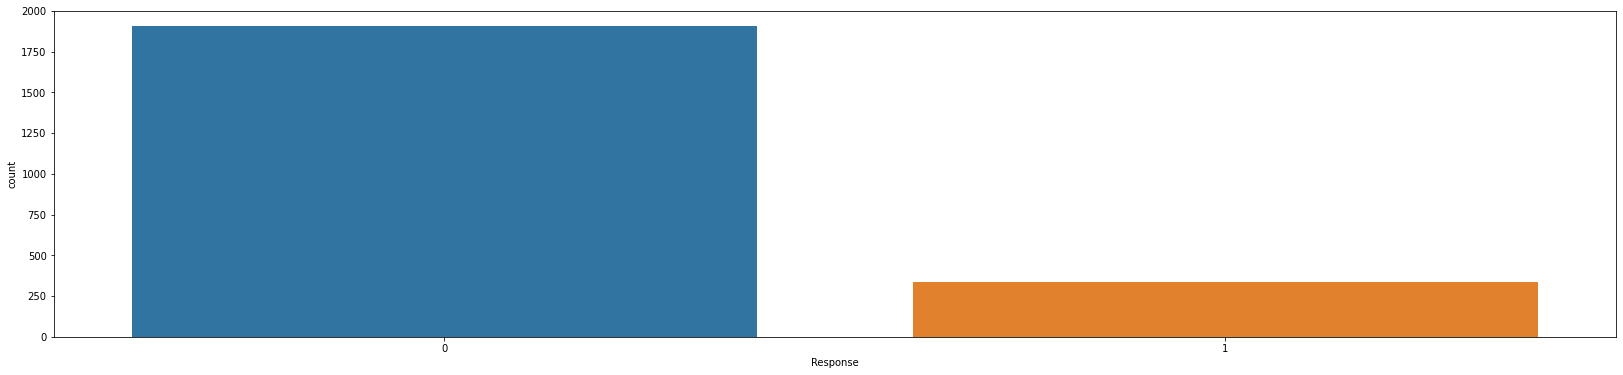

In [72]:
plt.figure(figsize=(28, 6))
sns.countplot(x="Response", data=data)

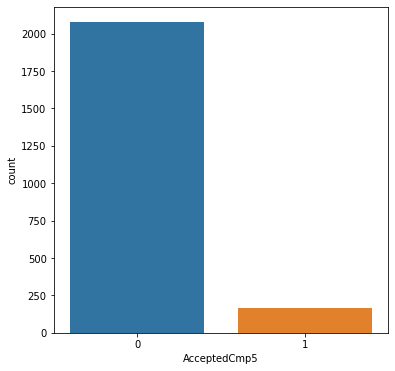

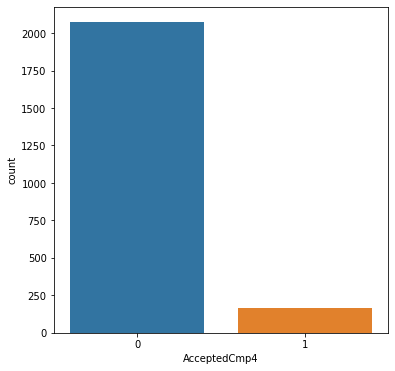

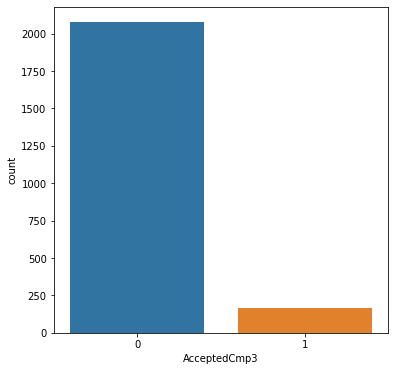

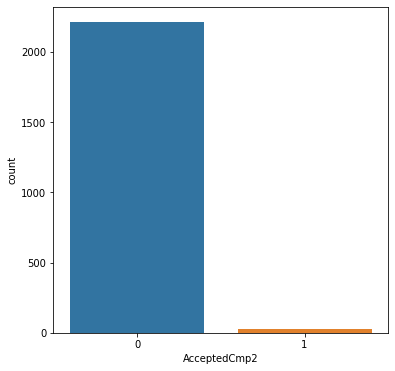

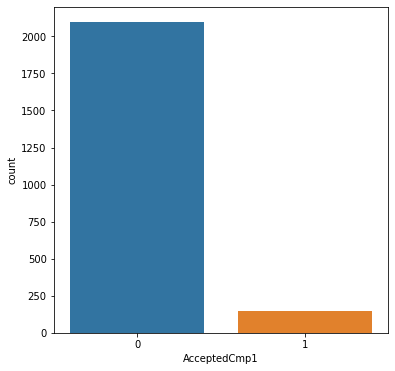

In [73]:
plt.figure(figsize=(6, 6))
sns.countplot(x="AcceptedCmp5", data=data)
plt.figure(figsize=(6, 6))
sns.countplot(x="AcceptedCmp4", data=data)
plt.figure(figsize=(6, 6))
sns.countplot(x="AcceptedCmp3", data=data)
plt.figure(figsize=(6, 6))
sns.countplot(x="AcceptedCmp2", data=data)
plt.figure(figsize=(6, 6))
sns.countplot(x="AcceptedCmp1", data=data)

In [74]:
data['TotalSpendings'] =  data.MntWines + data.MntFruits + data.MntMeatProducts + data.MntFishProducts + data.MntSweetProducts + data.MntGoldProds


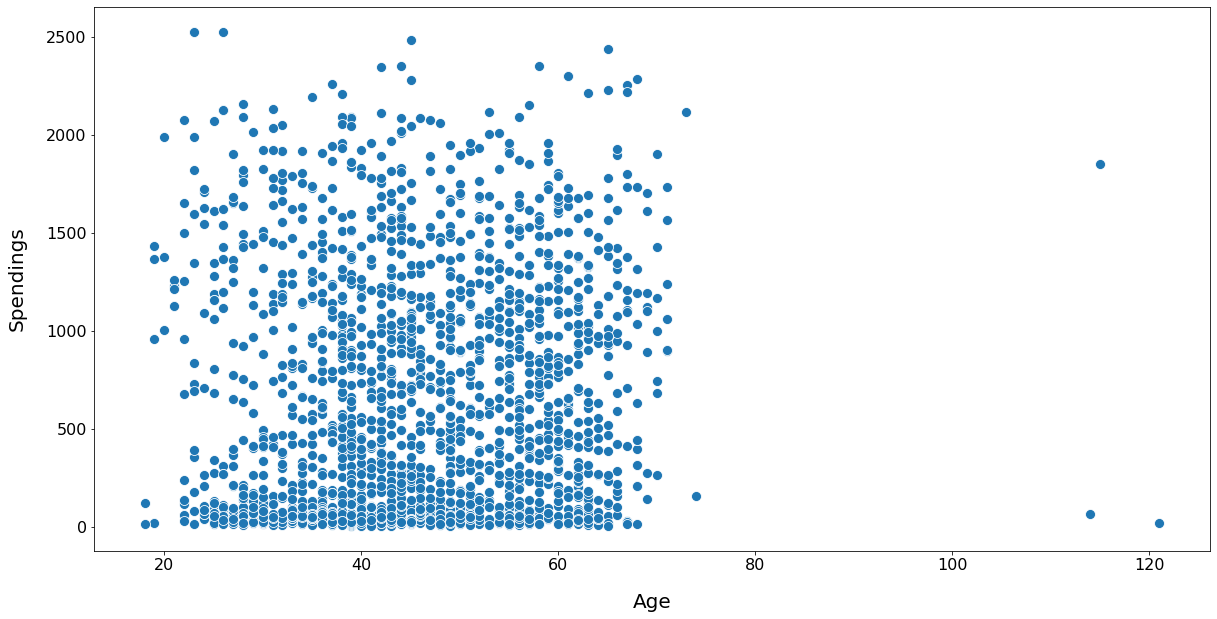

In [75]:
plt.figure(figsize=(20,10))
sns.scatterplot(x=data.Age, y=data.TotalSpendings, s=100);

plt.xticks( fontsize=16)
plt.yticks( fontsize=16)
plt.xlabel('Age', fontsize=20, labelpad=20)
plt.ylabel('Spendings', fontsize=20, labelpad=20);

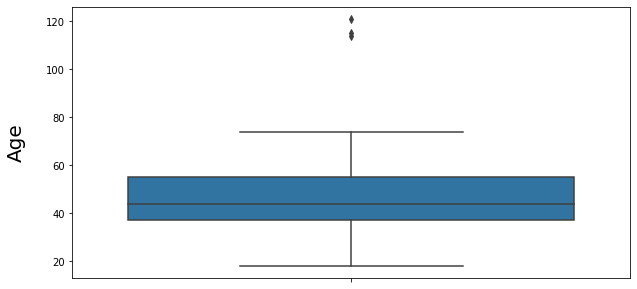

In [76]:
plt.figure(figsize=(10,5))
sns.boxplot(y=data.Age);
plt.ylabel('Age', fontsize=20, labelpad=20);

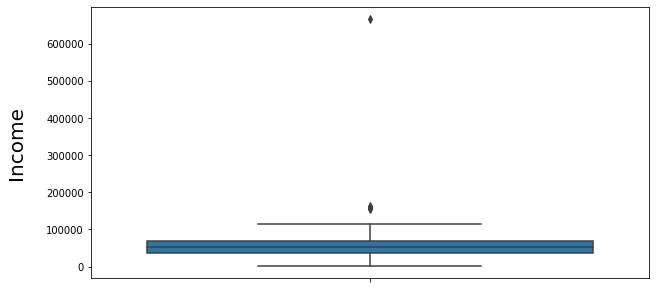

In [77]:
plt.figure(figsize=(10,5))
sns.boxplot(y=data.Income);
plt.ylabel('Income', fontsize=20, labelpad=20);

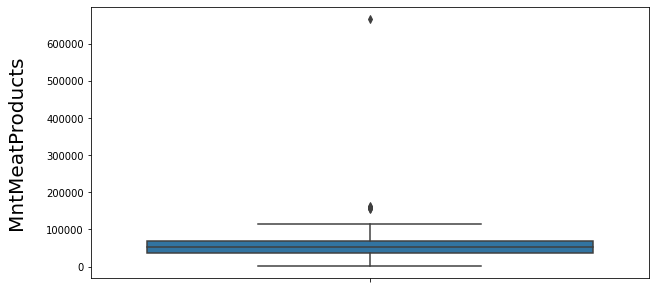

In [78]:
plt.figure(figsize=(10,5))
sns.boxplot(y=data.Income);
plt.ylabel('MntMeatProducts', fontsize=20, labelpad=20);

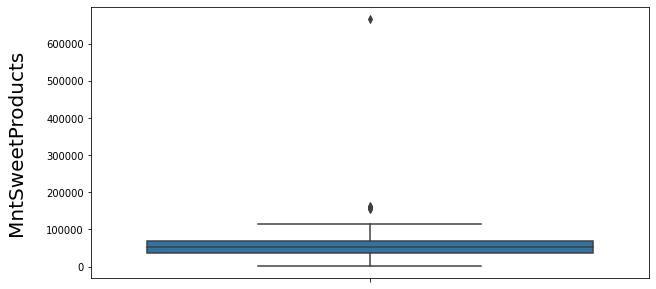

In [79]:
plt.figure(figsize=(10,5))
sns.boxplot(y=data.Income);
plt.ylabel('MntSweetProducts', fontsize=20, labelpad=20);

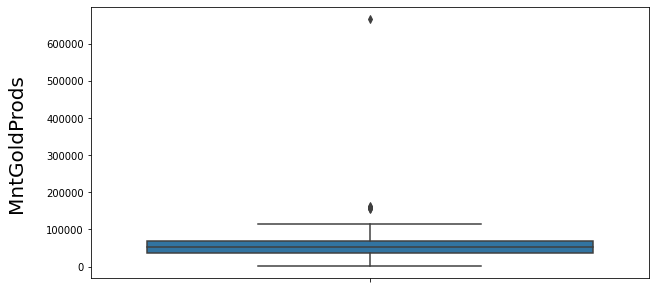

In [80]:
plt.figure(figsize=(10,5))
sns.boxplot(y=data.Income);
plt.ylabel('MntGoldProds', fontsize=20, labelpad=20);

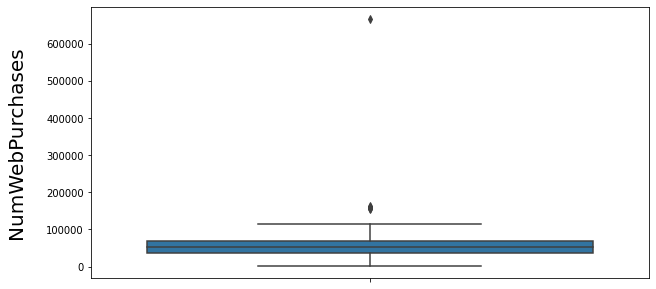

In [81]:
plt.figure(figsize=(10,5))
sns.boxplot(y=data.Income);
plt.ylabel('NumWebPurchases', fontsize=20, labelpad=20);

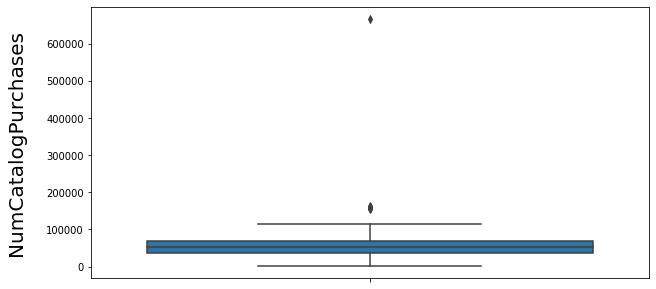

In [82]:
plt.figure(figsize=(10,5))
sns.boxplot(y=data.Income);
plt.ylabel('NumCatalogPurchases', fontsize=20, labelpad=20);

In [83]:
data = data[data['Age'] < 100]
data = data[data['Income'] < 60000]
data = data[data['MntMeatProducts'] < 1500]
data = data[data['MntSweetProducts'] < 250]
data = data[data['MntGoldProds'] < 300]
data = data[data['NumWebPurchases'] < 20]
data = data[data['NumCatalogPurchases'] < 20]

In [84]:
data_ags = data.copy()

In [85]:
columns = ['ID', 'Year_Birth','Age', 'Education', 'Marital_Status', 'Income',
       'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4',
       'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain',
       'Response']

In [86]:
data_ags = data_ags[columns]


In [87]:
data_ags.columns.values


array(['ID', 'Year_Birth', 'Age', 'Education', 'Marital_Status', 'Income',
       'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4',
       'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain',
       'Response'], dtype=object)

In [88]:
data_ags.head(2)

,ID,Year_Birth,Age,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,57,Graduation,Single,58138.0,0,0,2012-04-09,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1
1,2174,1954,60,Graduation,Single,46344.0,1,1,2014-08-03,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0


In [89]:
data_ags['Kids'] = data_ags['Kidhome'] + data_ags['Teenhome']


In [90]:
data_ags['Total Spending'] = (data_ags['MntWines'] + data_ags['MntFruits'] + 
                             data_ags['MntMeatProducts'] + data_ags['MntFishProducts'] + 
                             data_ags['MntSweetProducts'] + data_ags['MntGoldProds'])

In [91]:
data_ags['Total Purchases'] = (data_ags['NumDealsPurchases'] + data_ags['NumWebPurchases'] + 
                             data_ags['NumCatalogPurchases'] + data_ags['NumStorePurchases'] + 
                             data_ags['NumWebVisitsMonth'])

In [92]:
data_ags = data_ags.drop(['Kidhome', 'Teenhome', 'ID', 'Year_Birth', 'Dt_Customer'], axis=1)

In [93]:
data_tp = data_ags.drop(['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth'], axis=1)

In [94]:
data_tp.columns.values


array(['Age', 'Education', 'Marital_Status', 'Income', 'Recency',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Kids', 'Total Spending',
       'Total Purchases'], dtype=object)

In [95]:
columns_tp = ['Income', 'Recency', 
              'Total Spending', 'Total Purchases']

In [96]:
data_tbs = data_tp[columns_tp]


In [99]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [101]:
x_scaled_tbs = sc.fit_transform(data_tbs)
x_scaled_tbs

array([[ 1.50868321,  0.30570943,  4.76108673,  2.10015848],
       [ 0.59795627, -0.39002756, -0.73327404, -0.9774349 ],
       [-0.92311372, -0.80746975, -0.64342915, -0.5377787 ],
       ...,
       [-0.322732  ,  1.10580697, -0.72290732, -0.9774349 ],
       [ 1.41934024,  1.45367547,  3.46179135,  1.07429402],
       [ 1.10181359, -0.32045386, -0.23221598,  0.04842956]])

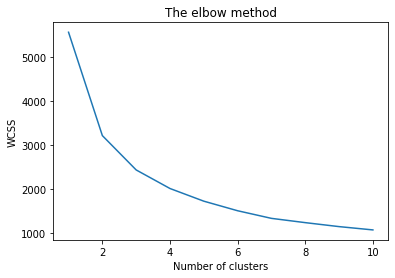

In [103]:

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x_scaled_tbs)
    wcss.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

In [106]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x_scaled_tbs)
y_kmeans

array([1, 2, 0, ..., 3, 1, 2], dtype=int32)

In [107]:
data_tbss_clusters = data_tp.copy()
data_tbss_clusters['Cluster'] = y_kmeans
data_tbss_clusters.head(2)

,Age,Education,Marital_Status,Income,Recency,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Kids,Total Spending,Total Purchases,Cluster
0,57,Graduation,Single,58138.0,58,0,0,0,0,0,0,1,0,1617,32,1
1,60,Graduation,Single,46344.0,38,0,0,0,0,0,0,0,2,27,11,2


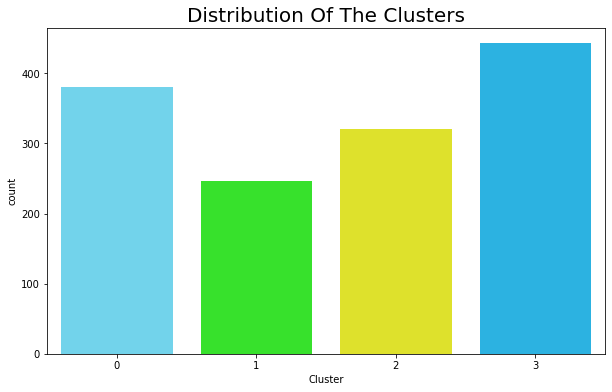

In [119]:
plt.figure(figsize=(10,6))
Cl = sns.countplot(x = 'Cluster', data = data_tbss_clusters, palette= ['#5EDFFF', '#1DFF0E', '#FBFF0E',  '#0EC1FF'])
Cl.set_title("Distribution Of The Clusters", size = 20)
plt.show()

<Figure size 432x288 with 0 Axes>

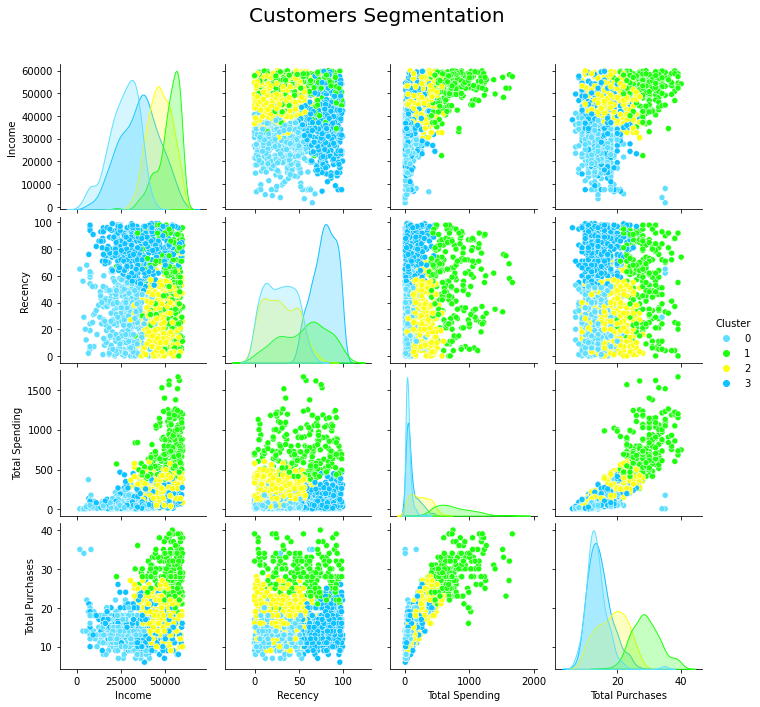

In [118]:
Features = ['Income', 'Recency', 'Total Spending', 'Total Purchases', 'Cluster']
plt.figure()
sns.pairplot(data_tbss_clusters[Features], hue = "Cluster", palette=['#5EDFFF', '#1DFF0E', '#FBFF0E',  '#0EC1FF'])
plt.subplots_adjust(top=0.9)
plt.suptitle('Customers Segmentation', size = 20)
plt.show()

#Customer Segments
## Based on Income, Spending, Purchases and Recency, the clusters can be categorised as:

#### 0: High Income, High Spending, High Purchases and High Recency
#### 1: Low Income, Low Spending, Low Purchases and Low Recency
#### 2: Average Income, Low Spending, Low Purchases and High Recency
#### 3: High Income, Average Spending, Average Purchases and Low Recency

In [117]:
data_cs = {'Features': ['Income', 'Spending', 'Purchases', 'Recency', 'Customer Segments'],
           'Cluster 0': ['High', 'High', 'High', 'High', 'Impulsive'], 'Cluster 1': ['Low', 'Low', 'Low', 'Low', 'Need-Based']
          , 'Cluster 2': ['Avg', 'Low', 'Low', 'Low', 'Wandering'], 'Cluster 3': ['High', 'Avg', 'Avg', 'Low', 'Loyal']}
cs = pd.DataFrame(data_cs)
cs

,Features,Cluster 0,Cluster 1,Cluster 2,Cluster 3
0,Income,High,Low,Avg,High
1,Spending,High,Low,Low,Avg
2,Purchases,High,Low,Low,Avg
3,Recency,High,Low,Low,Low
4,Customer Segments,Impulsive,Need-Based,Wandering,Loyal


* These are the customers segments identified from the analysis above.

### Clusters Distribution Along the Features
* The notion behind this plot is that its provides an overview of how diverse is our segmentation based on the features.
* This barchart shows the percentage of all the clusters in each feature.

In [120]:
data_tbss_clusters.columns.values


array(['Age', 'Education', 'Marital_Status', 'Income', 'Recency',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Kids', 'Total Spending',
       'Total Purchases', 'Cluster'], dtype=object)

In [121]:
grouped = (data_tbss_clusters.groupby(['Cluster']).agg({'Marital_Status': 'sum', 'Age': 'sum', 'Kids': 'sum',
                                                        'Education': 'sum', 'Recency': 'sum',
                                                        'Income': 'sum','Total Spending':'sum', 'Total Purchases':'sum'}))
grouped

,Marital_Status,Age,Kids,Education,Recency,Income,Total Spending,Total Purchases
Cluster,,,,,,,,
0,TogetherMarriedTogetherTogetherMarriedMarriedM...,15228,417,GraduationPhDPhDPhDBasicGraduationGraduationMa...,10786,1.006508e+07,22101,5130
1,SingleMarriedDivorcedMarriedTogetherDivorcedMa...,11772,270,GraduationPhDGraduationPhDGraduationPhDPhDGrad...,13702,1.287813e+07,186929,7150
2,SingleMarriedDivorcedMarriedTogetherMarriedMar...,15024,417,GraduationGraduationMasterGraduationGraduation...,9251,1.508769e+07,77146,5878
3,SingleSingleTogetherMarriedWidowMarriedSingleT...,19269,563,2n CycleGraduationMaster2n CycleGraduationMast...,34764,1.570087e+07,46791,6438


Text(0.5, 1.0, "Customers' Response Segment")

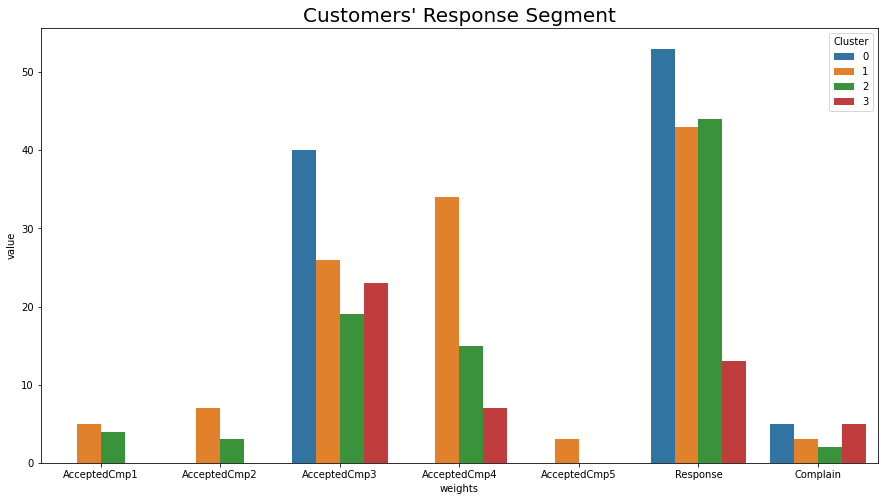

In [127]:
plt.figure(figsize=(15,8))

grouped = (data_tbss_clusters.groupby(['Cluster']).agg({'AcceptedCmp1': 'sum','AcceptedCmp2': 'sum', 
                                                        'AcceptedCmp3': 'sum','AcceptedCmp4': 'sum', 
                                                        'AcceptedCmp5': 'sum', 'Response': 'sum', 'Complain': 'sum'})
           .stack().reset_index().rename(columns = {'level_1':'weights', 0: 'value'}))

h = sns.barplot(x = 'weights', y = 'value', hue = 'Cluster', data = grouped)
h.set_title("Customers' Response Segment", size=20)

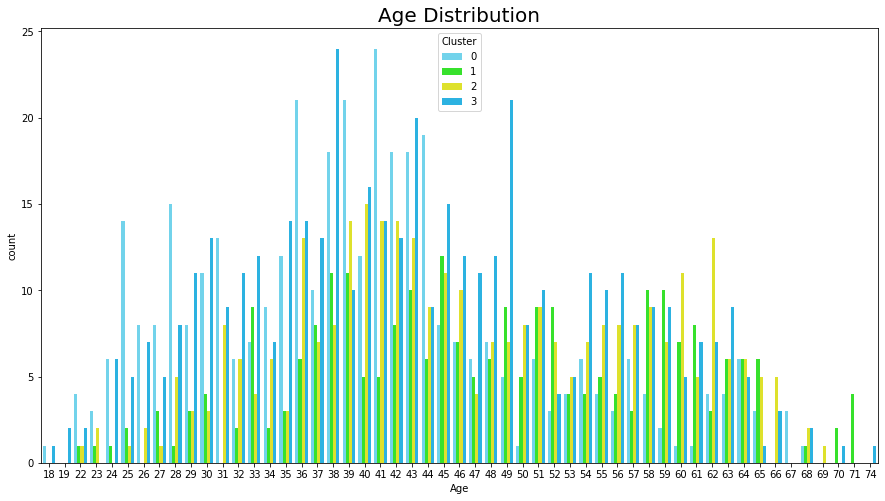

In [130]:
plt.figure(figsize=(15,8))
pl = sns.countplot(x = 'Age', hue=data_tbss_clusters['Cluster'], data = data_tbss_clusters, palette= ['#5EDFFF', '#1DFF0E', '#FBFF0E',  '#0EC1FF'])
pl.set_title("Age Distribution", size=20)
plt.show()

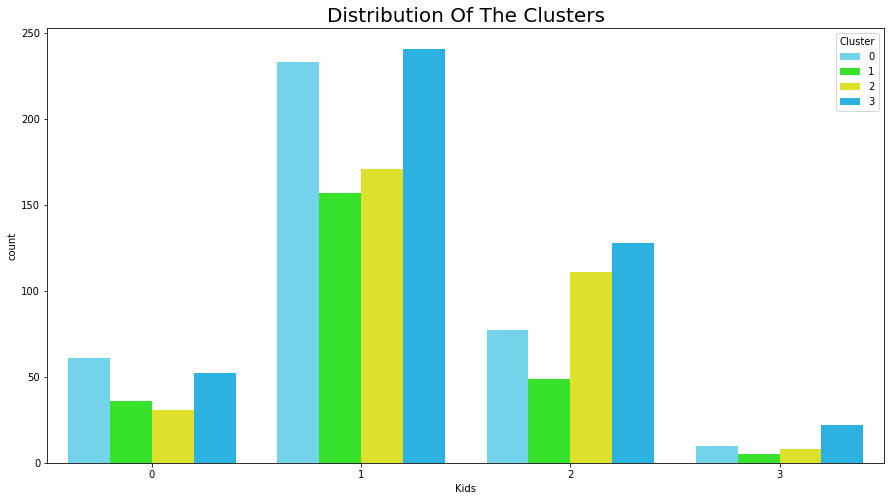

In [131]:
plt.figure(figsize=(15,8))
pl = sns.countplot(x = 'Kids', hue=data_tbss_clusters['Cluster'], data = data_tbss_clusters, palette= ['#5EDFFF', '#1DFF0E', '#FBFF0E',  '#0EC1FF'])
pl.set_title("Distribution Of The Clusters", size=20)
plt.show()

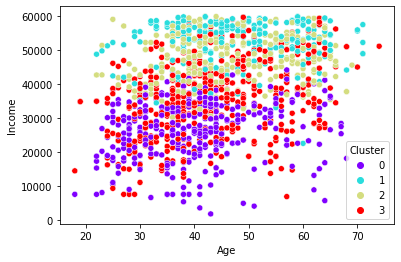

In [132]:
sns.scatterplot(data = data_tbss_clusters, x = 'Age', y = 'Income', hue='Cluster', palette='rainbow') 

Text(0.5, 0.98, 'Customer Demographics')

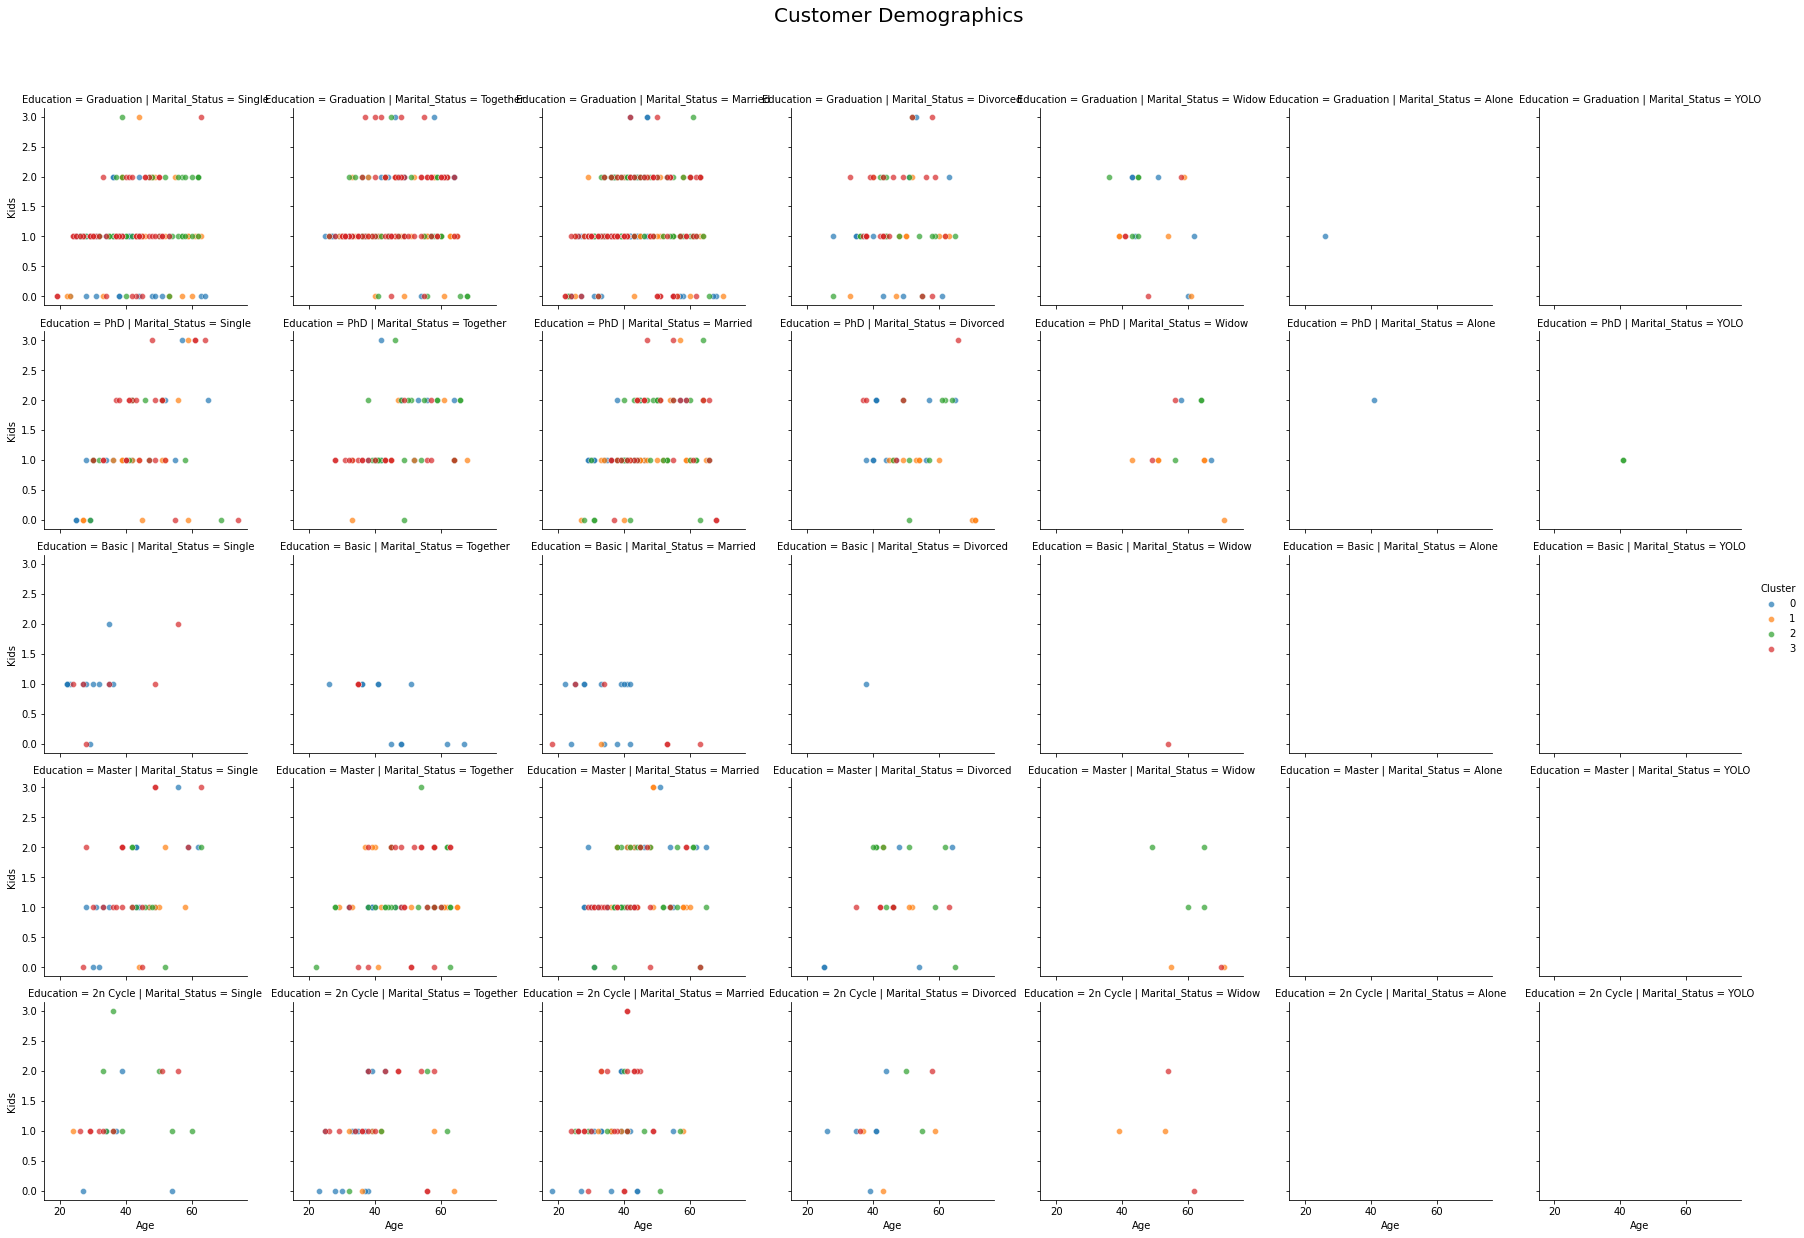

In [135]:
g = sns.FacetGrid(data_tbss_clusters, col="Marital_Status", row="Education", hue="Cluster", height = 3.5, aspect= 1)
g.map(sns.scatterplot, "Age", "Kids", alpha=.7)
g.add_legend()
g.fig.subplots_adjust(top=0.9) # adjust the Figure in rp
g.fig.suptitle('Customer Demographics', size=20)

In [186]:
data = {'Features': ['Income', 'Spending', 'Purchases', 'Recency', 'Customer Segments'],
           'Cluster 0': ['High', 'High', 'High', 'High', 'Impulsive'], 'Cluster 1': ['Low', 'Low', 'Low', 'Low', 'Need-Based']
          , 'Cluster 2': ['Avg', 'Low', 'Low', 'Low', 'Wandering'], 'Cluster 3': ['High', 'Avg', 'Avg', 'Low', 'Loyal']}
cs = pd.DataFrame(data)
cs

,Features,Cluster 0,Cluster 1,Cluster 2,Cluster 3
0,Income,High,Low,Avg,High
1,Spending,High,Low,Low,Avg
2,Purchases,High,Low,Low,Avg
3,Recency,High,Low,Low,Low
4,Customer Segments,Impulsive,Need-Based,Wandering,Loyal


###Demographics
* Need-Based customers dominate the age groups between 20 - 45.
* All the customer segments are dominated by individuals with kids.
* Loyal customers have atleast a graduate degree and have high income.


###Campaign Reponse
* Majority of the customers regardless of segment accepted the offer after 5th Campaign.
* From the ones who accepted the offer in first campaign, Loyal customers were the highest, while impulsive customers on second.
* Response to campaign acceptance was signficant 3rd campaign, and 'Need-Based customers' were highest among them. The reason behind this would be because of frequent visits by the Need-Based customers and products offered through the campaign may align with their demands.
* Complain were highest from Need-Based and Wandering customers, which may correlate with their income status, and in their lack of interest in first two campaigns.

In [196]:
import sklearn.preprocessing as pre
import sklearn.model_selection as ms

In [197]:
le=pre.LabelEncoder()
for x in data_tbss_clusters.select_dtypes(include='object').columns.tolist():
  data_tbss_clusters[x]=le.fit_transform(data_tbss_clusters[x])

In [198]:
x=data_tbss_clusters.drop(['Cluster'],axis=1)
y=data_tbss_clusters['Cluster']

In [199]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 789)

In [200]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((974, 15), (418, 15), (974,), (418,))

[12:18:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


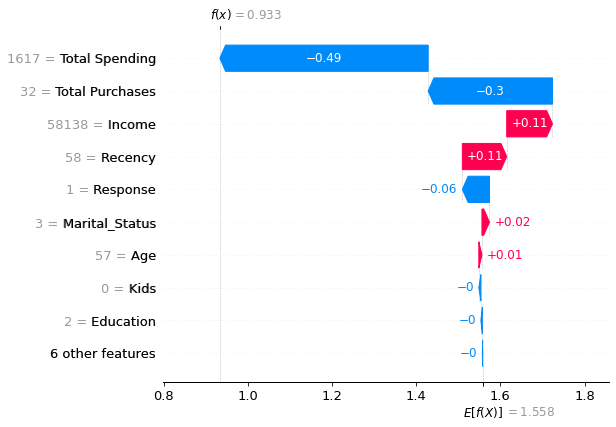

In [201]:
import xgboost
import shap
model = xgboost.XGBRegressor().fit(X_train,y_train)

explainer = shap.Explainer(model)
shap_values = explainer(x)

shap.plots.waterfall(shap_values[0])

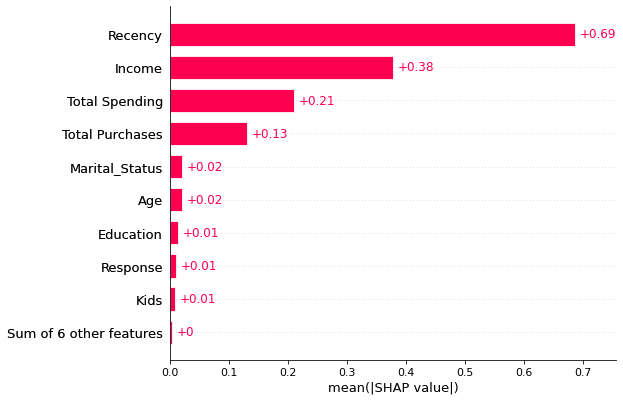

In [202]:
shap.plots.bar(shap_values)

[12:18:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


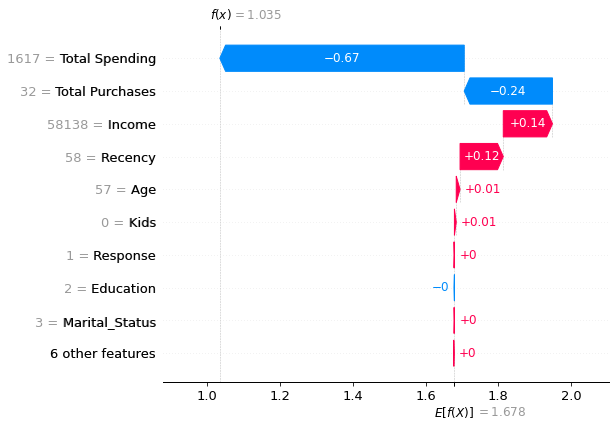

In [203]:
model = xgboost.XGBRegressor().fit(X_test,y_test)

explainer = shap.Explainer(model)
shap_values = explainer(x)

shap.plots.waterfall(shap_values[0])

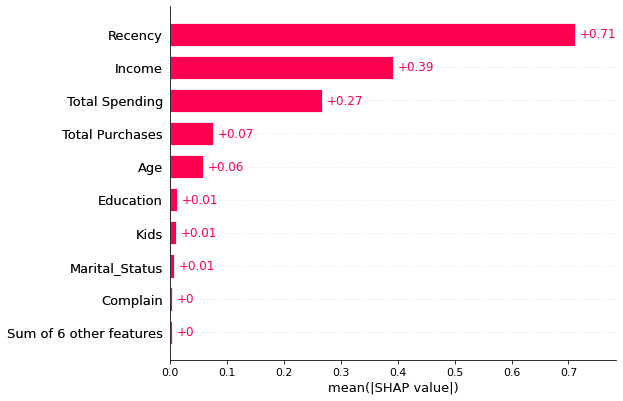

In [204]:
shap.plots.bar(shap_values)

### Recommendations :
* Unrepairable damage to the brand
* Losing out on business in real time
* Giving your competitors an edge over you
* Brand guidelines, colour palette and corporate style guide
* Social media, public relations and external communication policy
* A process to handle all external communication with various stakeholders like Public Relation firms, Analyst Relation firms, media, social influencers, industry experts, etc.

